In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

print("Built with CUDA:", tf.test.is_built_with_cuda())
print("Using GPU:", tf.test.is_gpu_available(cuda_only=True))


TensorFlow version: 2.10.0
Num GPUs Available: 1
GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Built with CUDA: True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Using GPU: True


In [2]:
import pandas as pd
import numpy as np

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [13]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# EDA

In [14]:
cat_columns = df.select_dtypes(include='object').columns

In [15]:
cat_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [16]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'gold', 'turquoise']

C:\Users\write\AppData\Local\Temp\ipykernel_21916\4167578975.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set1')


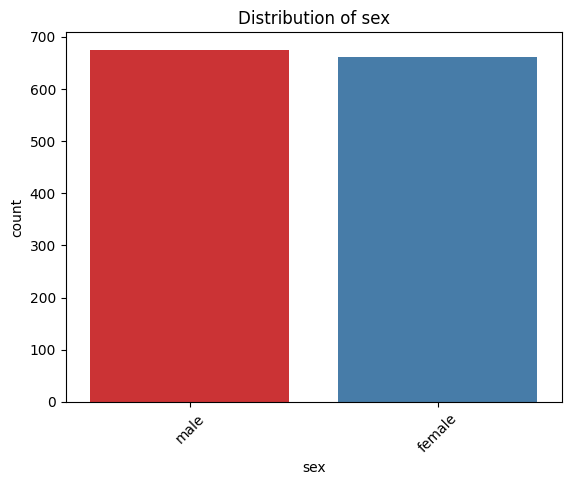

C:\Users\write\AppData\Local\Temp\ipykernel_21916\4167578975.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set1')


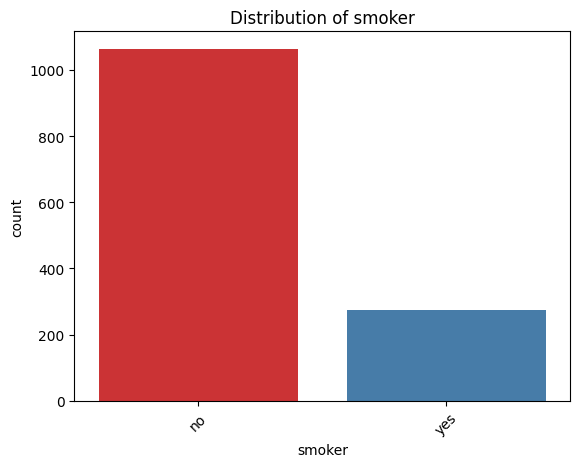

C:\Users\write\AppData\Local\Temp\ipykernel_21916\4167578975.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set1')


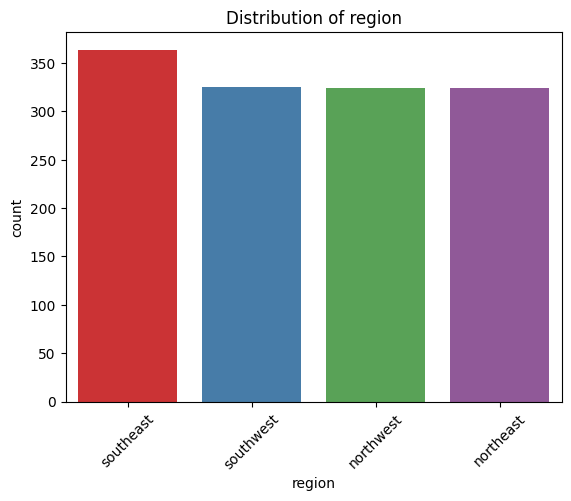

In [17]:
if len(cat_columns) == 0:
    print("No Categorical Columns Found")

else:
    for idx, col in enumerate(cat_columns):
        if df[col].nunique() < 20:
            plt.figure()
            # sns.countplot(data=df, x=col, order=df[col].value_counts().index, color=colors[idx % len(colors)])
            sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set1')
            plt.xticks(rotation=45)
            plt.title(f"Distribution of {col}")
            plt.show()


### plotting the numerical columns

In [18]:
num_cols = df.select_dtypes(include=np.number).columns

In [19]:
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

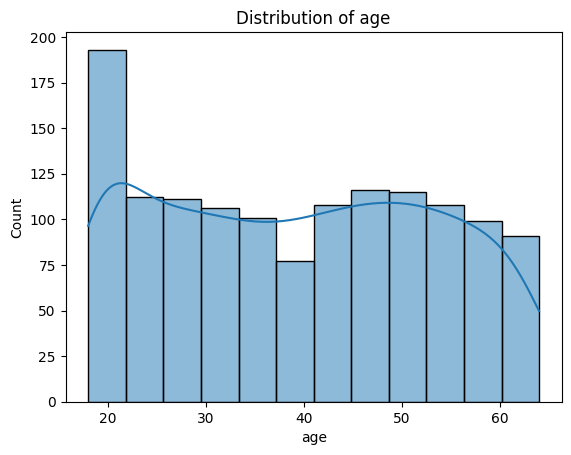

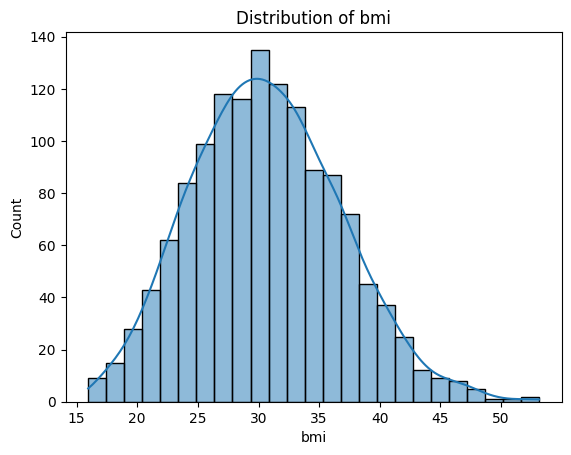

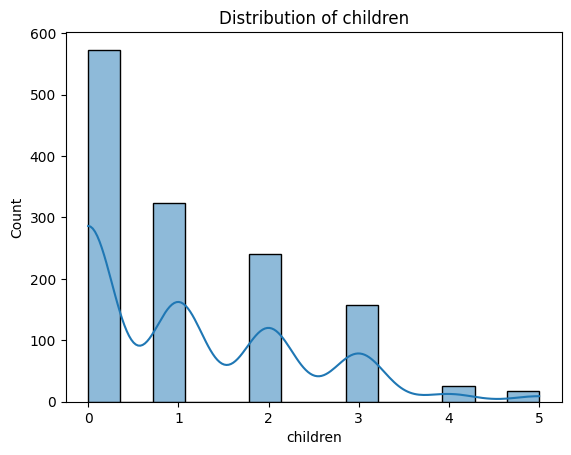

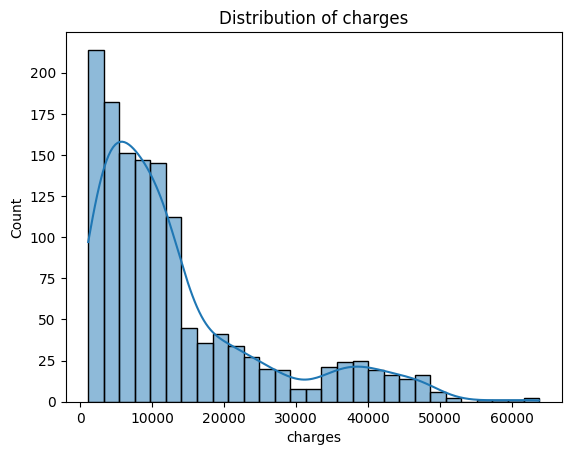

In [20]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Boxplot for the columns

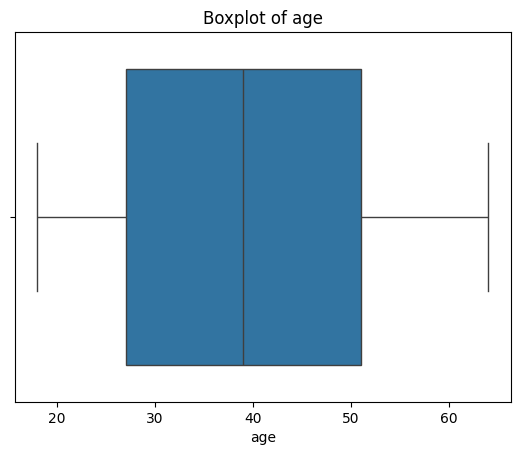

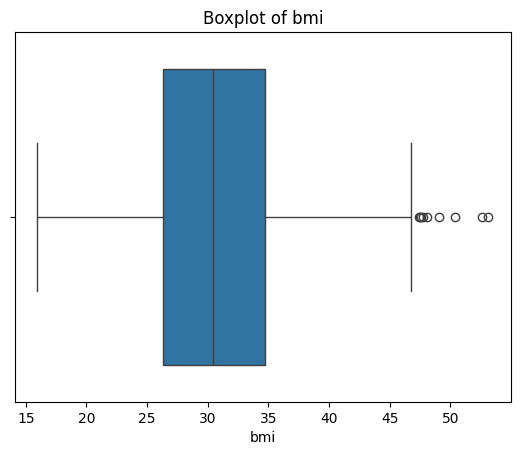

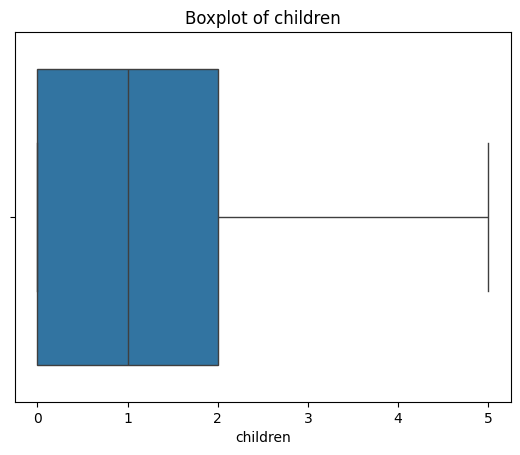

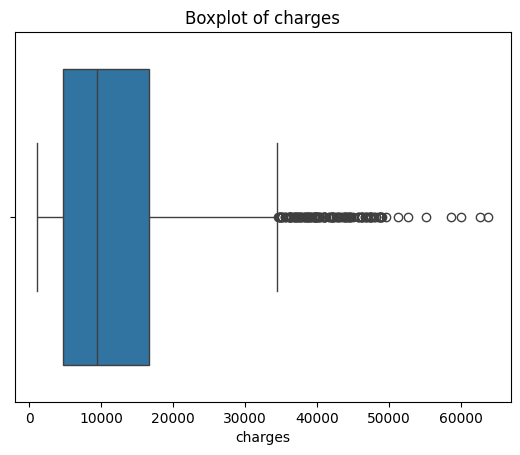

In [21]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Boxplot in one

In [22]:
df_box = df[num_cols].dropna()

In [23]:
df_box.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [24]:
df_melted = df_box.melt()

In [25]:
df_melted.head()

,variable,value
0,age,19.0
1,age,18.0
2,age,28.0
3,age,33.0
4,age,32.0


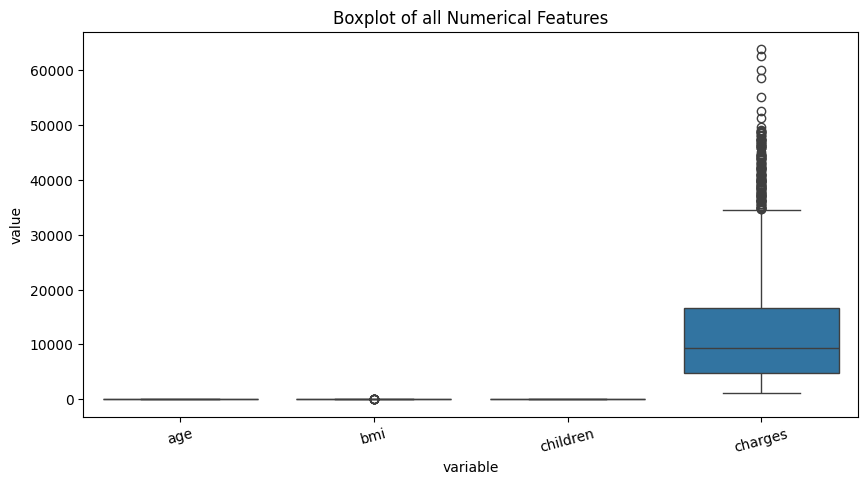

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot of all Numerical Features')
plt.xticks(rotation=15)
plt.show()

### Correlation



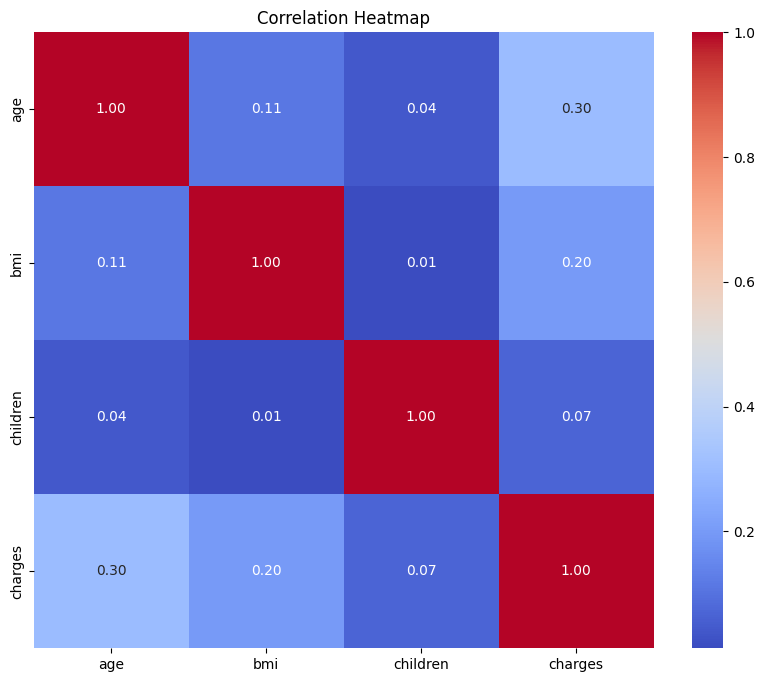

In [27]:
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

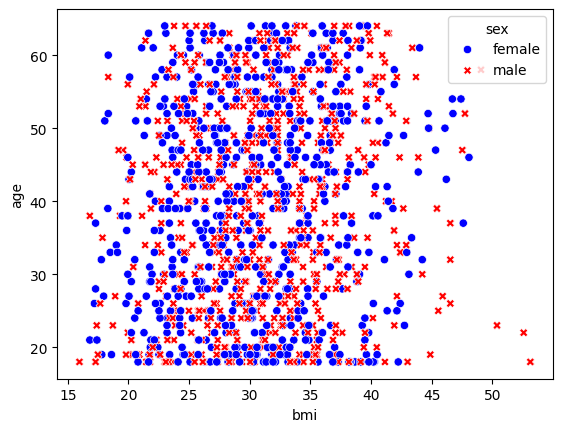

In [28]:
sns.scatterplot(x='bmi',y='age', data=df, style='sex', hue='sex', palette={'female':'blue', 'male':'red'})
plt.show()

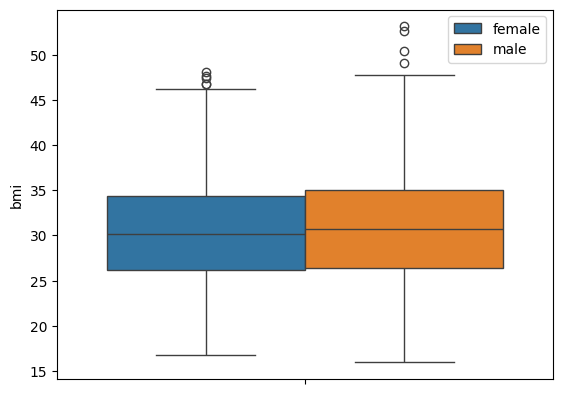

In [29]:
sns.boxplot(y='bmi',  hue='sex',data=df)
plt.legend()
plt.show()

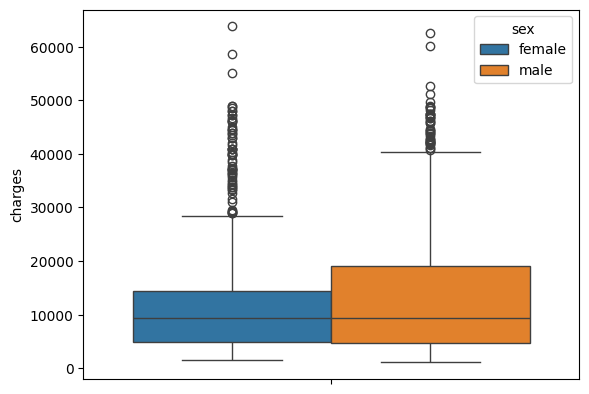

In [30]:
sns.boxplot(y='charges', data=df, hue='sex')
plt.show()

# Model Training

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
X = df.drop(columns=['charges'])
y = df['charges']

In [33]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


In [37]:
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [38]:
cat_columns

Index(['sex', 'smoker', 'region'], dtype='object')

### Encoding

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [41]:
encoded_categorical_df = pd.DataFrame(ohe.fit_transform(df[cat_columns]), columns=ohe.get_feature_names_out(cat_columns), index=df.index)

In [42]:
encoded_categorical_df.shape

(1337, 8)

In [43]:
encoded_categorical_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [44]:
encoded_categorical_df.shape

(1337, 8)

In [45]:
numerical_df = df[num_cols]

In [46]:
numerical_df.shape

(1337, 4)

In [47]:
final_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)

In [48]:
final_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [49]:
final_df.shape

(1337, 12)

# ANN

In [50]:
from tensorflow.keras.models import Sequential

In [51]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [52]:
X_train.shape

(1069, 6)

In [53]:
X_test.shape

(268, 6)

In [54]:
model = Sequential()

In [55]:
model.add(Dense(256, activation='relu', input_shape=[11]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='linear'))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [58]:
final_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [59]:
X = final_df.drop(columns=['charges'])
y = final_df['charges']

In [60]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 11)
(268, 11)
(1069,)
(268,)


In [62]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1114,23,24.510,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
968,21,25.745,2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
599,52,37.525,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
170,63,41.470,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
275,47,26.600,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [63]:
np.array(X_train).astype(np.float32)

array([[23.   , 24.51 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [21.   , 25.745,  2.   , ...,  0.   ,  0.   ,  0.   ],
       [52.   , 37.525,  2.   , ...,  1.   ,  0.   ,  0.   ],
       ...,
       [20.   , 22.   ,  1.   , ...,  0.   ,  0.   ,  1.   ],
       [38.   , 28.   ,  3.   , ...,  0.   ,  0.   ,  1.   ],
       [35.   , 35.86 ,  2.   , ...,  0.   ,  1.   ,  0.   ]],
      dtype=float32)

In [64]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
34/34 [==============================] - 3s 29ms/step - loss: 304818688.0000 - mae: 12962.5420 - mse: 304818688.0000 - val_loss: 377569472.0000 - val_mae: 13949.4062 - val_mse: 377569472.0000
Epoch 2/200
34/34 [==============================] - 0s 12ms/step - loss: 247695888.0000 - mae: 10769.1875 - mse: 247695888.0000 - val_loss: 195233184.0000 - val_mae: 8300.4268 - val_mse: 195233184.0000
Epoch 3/200
34/34 [==============================] - 0s 13ms/step - loss: 126302424.0000 - mae: 8943.6221 - mse: 126302424.0000 - val_loss: 165243216.0000 - val_mae: 9193.9268 - val_mse: 165243216.0000
Epoch 4/200
34/34 [==============================] - 0s 12ms/step - loss: 122426192.0000 - mae: 8758.5791 - mse: 122426192.0000 - val_loss: 160031632.0000 - val_mae: 9541.8379 - val_mse: 160031632.0000
Epoch 5/200
34/34 [==============================] - 0s 15ms/step - loss: 121359488.0000 - mae: 8846.7422 - mse: 121359488.0000 - val_loss: 160284448.0000 - val_mae: 9352.6143 - val_mse: 16

### Analysing the Model Output

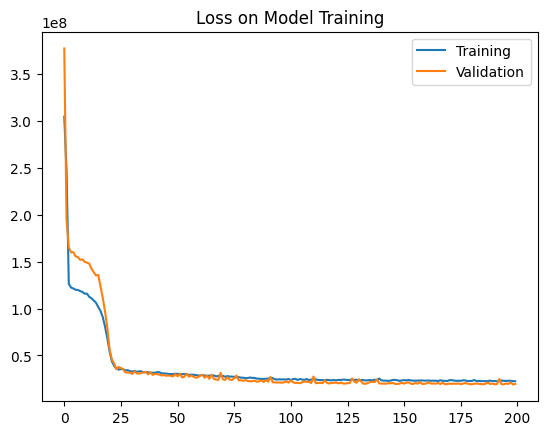

In [65]:
plt.title("Loss on Model Training")

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

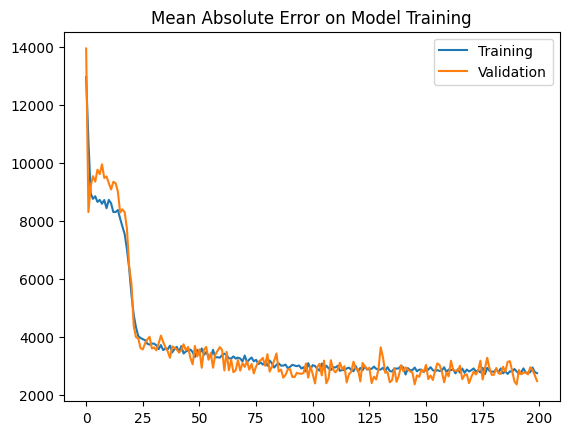

In [66]:
plt.title("Mean Absolute Error on Model Training")

plt.plot(history.history['mae'], label='Training')
plt.plot(history.history['val_mae'], label='Validation')
plt.legend()
plt.show()

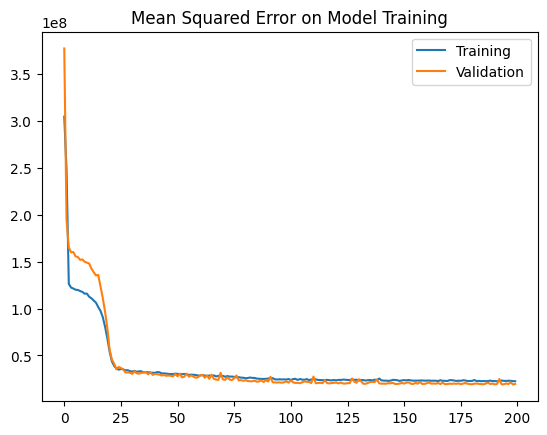

In [67]:
plt.title("Mean Squared Error on Model Training")

plt.plot(history.history['mse'], label='Training')
plt.plot(history.history['val_mse'], label='Validation')
plt.legend()
plt.show()

# Exporting Model

In [68]:
import tensorflow as tf

In [69]:
model.save('model.h5')